# Лабораторна работа №3

Функция Матьяса через Numba

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import numba as nb
from numba import jit
from sklearn import datasets
from typing import Tuple, Mapping
import datetime

In [2]:
def f (x,y):      # Функция Матьяса
    return 0.26 * (x*x + y*y) - 0.48*x*y

def gradf (x,y):
    return np.array([(0.52*x - 0.48*y), (-0.48*x + 0.52*y)])

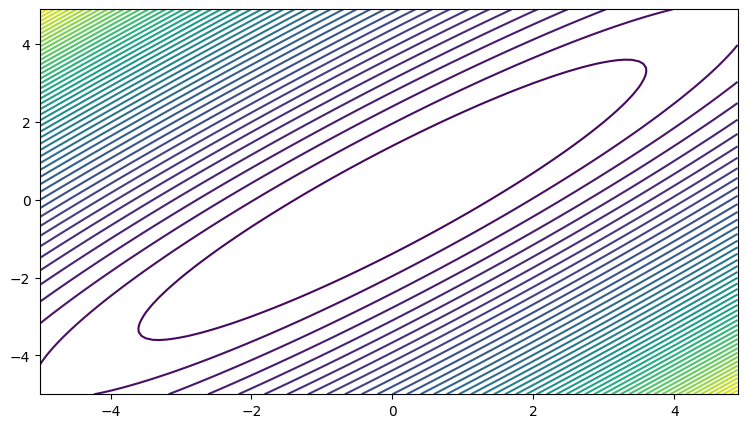

In [3]:
from matplotlib.ticker import MaxNLocator

grid_points = 100
a = b = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(a, b)
# np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)
c = np.array(f(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)

levelsf = MaxNLocator(nbins=100).tick_values(Z.min(), Z.max())
levels = MaxNLocator(nbins=20).tick_values(Z.min(), Z.max())

# Create figure
fig, ax = plt.subplots(figsize=(9,5))
cs = ax.contour(X, Y, Z, 50)
    
plt.show()

In [4]:
@jit
def f (x,y):      # Функция Матьяса
    return 0.26 * (x*x + y*y) - 0.48*x*y

@jit
def gradf (x,y):
    return np.array([(0.52*x - 0.48*y), (-0.48*x + 0.52*y)])

In [5]:
@jit
def gd(f, gradf, x0, y0, lr=0.01, lrf=10, k=0.1, km=0.9, kms=0.9, N=300):
    '''
    f - функция
    gradf - градиент функции
    x0,y0 - начальные точки
    lr - learning rate
    lrf - learning rate falloff
    k - коеф
    kms - коеф
    N - итерации
    '''
    m = np.zeros(gradf(x0 ,y0).shape)
    gradSq = np.zeros((gradf(x0,y0)**2).shape)

    for i in range(N):
        if (i%lrf) == 0:
            lr*=k
        m=km*m-lr*(1-km)*gradf(x0,y0)
        gradSq=kms*gradSq+(1-kms)*gradf(x0,y0)**2

        n = (lr*gradf(x0,y0)*m)/(gradSq+10**(-6))**0.5

        x = x0-n[0]
        y = y0-n[1]
    return x,y, f(x,y)

In [6]:
z, y = datasets.make_blobs(n_samples=10, centers=2, n_features=2, random_state=0)
y = np.zeros(10)
x = np.zeros(10)
for i in range(len(z)):
    x[i],y[i] = z[i];
x, y

(array([ 1.12031365, -0.49772229,  1.9263585 ,  2.49913075,  3.54934659,
         1.7373078 ,  2.91970372,  2.84382807,  0.87305123,  2.36833522]),
 array([5.75806083, 1.55128226, 4.15243012, 1.23133799, 0.6925054 ,
        4.42546234, 0.15549864, 3.32650945, 4.71438583, 0.04356792]))

In [7]:
best_x, best_y, fgd = gd(f, gradf, x, y)
gd_ind = np.argmin(fgd)
best_x, best_y, fgd, gd_ind

/var/folders/kx/gsvn8_z12wq4yrrzfdh5sfth0000gn/T/ipykernel_18718/877684482.py:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "gd" failed type inference due to: Invalid use of type(CPUDispatcher(<function gradf at 0x10609c940>)) with parameters (array(float64, 1d, C), array(float64, 1d, C))

During: resolving callee type: type(CPUDispatcher(<function gradf at 0x10609c940>))
During: typing of call at /var/folders/kx/gsvn8_z12wq4yrrzfdh5sfth0000gn/T/ipykernel_18718/877684482.py (3)


File "../../../../../../var/folders/kx/gsvn8_z12wq4yrrzfdh5sfth0000gn/T/ipykernel_18718/877684482.py", line 3:
<source missing, REPL/exec in use?>

  @jit
/var/folders/kx/gsvn8_z12wq4yrrzfdh5sfth0000gn/T/ipykernel_18718/877684482.py:1: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "gd" failed type inference due to: Cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "../

(array([ 1.12031365, -0.49772229,  1.9263585 ,  2.49913075,  3.54934659,
         1.7373078 ,  2.91970372,  2.84382807,  0.87305123,  2.36833522]),
 array([5.75806083, 1.55128226, 4.15243012, 1.23133799, 0.6925054 ,
        4.42546234, 0.15549864, 3.32650945, 4.71438583, 0.04356792]),
 array([5.85029509, 1.0607048 , 1.60836543, 0.5409886 , 2.22031849,
        2.18634107, 2.00477613, 0.43897598, 4.00115741, 1.40930852]),
 7)

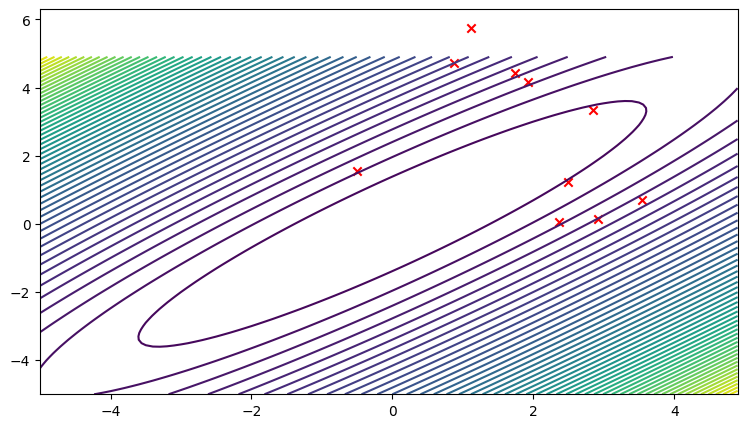

In [8]:
from matplotlib.ticker import MaxNLocator

grid_points = 100
a = b = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(a, b)
# np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)
c = np.array(f(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)

levelsf = MaxNLocator(nbins=100).tick_values(Z.min(), Z.max())
levels = MaxNLocator(nbins=20).tick_values(Z.min(), Z.max())

# Create figure
fig, ax = plt.subplots(figsize=(9,5))

# Показываем лучших представителей за каждое поколение
ax.scatter(best_x, best_y, marker='x', color='r')

cs = ax.contour(X, Y, Z, 50)
    
plt.show()

## Химмельблау

In [9]:
#Функция Химмельблау
@jit(fastmath=True)
def hb(x: np.ndarray):
  return (x[0]**2+x[1]-11)**2+(x[0]+x[1]**2-7)**2
#Производная по x
@jit(fastmath=True)
def hbdx(x: np.ndarray):
  return 2*(2*x[0]*(x[0]**2+x[1]-11)+x[0]+x[1]**2-7)
#Производная по y
@jit(fastmath=True)
def hbdy(x: np.ndarray):
  return 2*(x[0]**2+2*x[1]*(x[0]+x[1]**2-7)+x[1]-11)

In [12]:
@jit(fastmath=True)
def NB_GradientDescent(E: Mapping, dEdx: Mapping, dEdy: Mapping, x:np.ndarray,LearningRate, Iterations):
  x0 = x[0];
  y0 = x[1];
  x1=x0-LearningRate * dEdx(np.array([x0, y0]))
  y1=y0-LearningRate * dEdy(np.array([x0, y0]))
  for _ in range(Iterations):
    x0=x1
    y0=y1
    x1=x0-LearningRate * dEdx(np.array([x0, y0]))
    y1=y0-LearningRate * dEdy(np.array([x0, y0]))
  return x1,y1, E(np.array([x1,y1]))

In [18]:
start_time_with_NUMBA_H = datetime.datetime.now()
x,y,NB_HStopPoint = NB_GradientDescent(hb, hbdx, hbdy, np.array([-5,5]), 0.001, 500000)
time_with_NUMBA_H = datetime.datetime.now() - start_time_with_NUMBA_H
print("Время работы с NUMBA:\n", time_with_NUMBA_H)
print('x={0}, y={1}, E={2}'.format(x,y,NB_HStopPoint))

Время работы с NUMBA:
 0:00:00.050023
x=-2.805118086952748, y=3.1313125182505757, E=6.192558105984943e-28
